In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
pdf = pd.read_csv('diabetes.csv')

In [34]:
pdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
pdf.shape

(768, 9)

In [37]:
print(pdf.Outcome.value_counts())


0    500
1    268
Name: Outcome, dtype: int64


In [38]:
pdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
pdf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(pdf[featureList].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [41]:
for col in featureList:
  pdf[col] = pdf[col].replace({ 0 : pdf[col].mean() })

In [42]:
pdf[featureList].isin({0}).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [43]:
%matplotlib inline

In [44]:
pdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


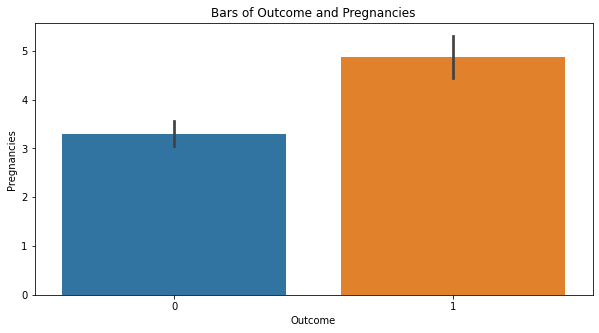

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outcome', y='Pregnancies', data=pdf, ) 

plt.title("Bars of Outcome and Pregnancies")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")
plt.show()

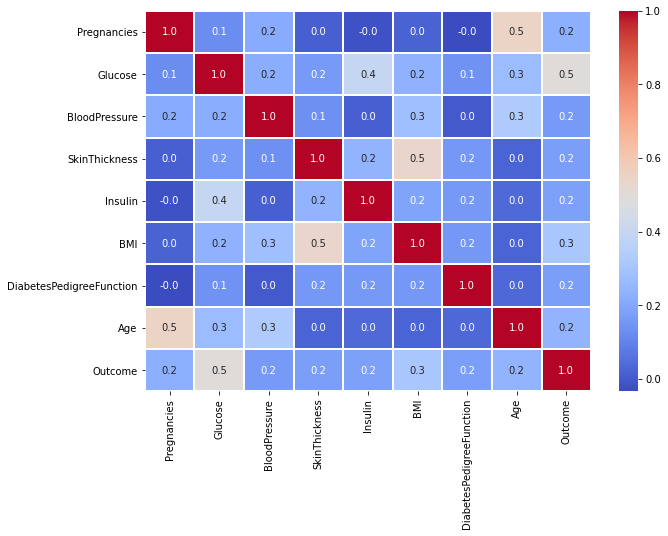

In [46]:
plt.figure(figsize=(10, 7))

sns.heatmap(pdf.corr(), annot=True, linewidths=0.2, fmt='.1f', cmap='coolwarm') # cmap='RdYlBu'
plt.show()

In [47]:
feature_columns = pdf[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

feature_columns.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [48]:
outcome_column = pdf['Outcome']
outcome_column.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split( feature_columns, outcome_column, test_size=0.2, random_state=5)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614,)
(154,)


In [51]:
model = LogisticRegression()

In [52]:
model = model.fit(X_train, y_train)

In [53]:
score = model.predict(X_train)

In [54]:
print("Training Score: ", model.score(X_train, y_train))
print("Testing Score:  ", model.score(X_test, y_test))

Training Score:  0.7736156351791531
Testing Score:   0.8116883116883117


In [55]:
pred = model.predict(X_test)
print("Model Accuracy is : ", pred)

Model Accuracy is :  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1]


In [56]:
model.intercept_

array([-8.71858449])

In [57]:
model.coef_

array([[ 0.03564753, -0.01142321, -0.00493961, -0.00110985,  0.09727685,
         0.81770069,  0.03296364]])

In [58]:
accuracy_score(y_test, pred)

0.8116883116883117